<a href="https://colab.research.google.com/github/Abdelmuti/Witty-journey/blob/main/Copy_of_SVM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy for C=0.01: 0.7079
Accuracy for C=1: 0.7047
Accuracy for C=100: 0.6710


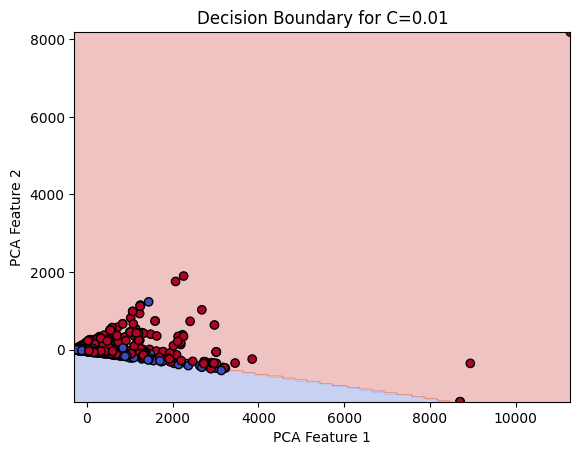

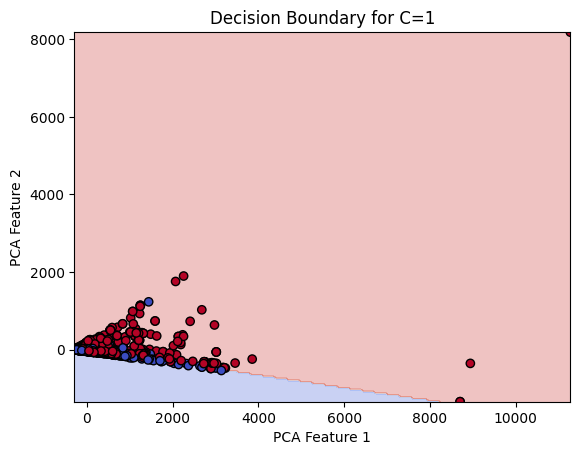

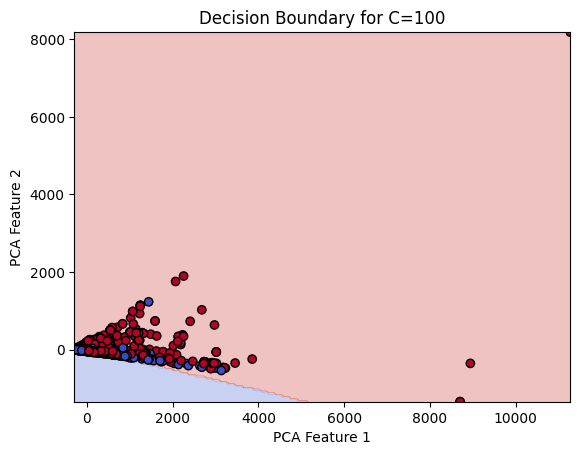

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

# Load dataset
X, y = fetch_openml(name="spambase", version=1, as_frame=False, return_X_y=True)

# Convert labels from {0,1} to {-1,1} for SVM
y = y.astype(int)
y[y == 0] = -1

# Reduce dataset to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define different C values to test
C_values = [0.01, 1, 100]
models = {}

# Train SVM models with different C values
for C in C_values:
    clf = SVC(C=C, kernel="linear")
    clf.fit(X_train, y_train)
    models[C] = clf

# Evaluate models and print accuracy
for C, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C={C}: {accuracy:.4f}")

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.show()

# Plot decision boundaries for each model
for C, model in models.items():
    plot_decision_boundary(model, X_train, y_train, f"Decision Boundary for C={C}")
